# Lecture 1: The computational real neuron. 

Welcome to the SageMaker workshop. 

## Supervised Learning.

Supervised learning is the task of arriving at a mathematical mapping function from the co-variate space to the variate space using a labeled training dataset. The training dataset is of a set of co-variate - variate sample mapping. In supervised learning, each example is a pair consisting of an input object (typically a vector) and a desired output value (also called the supervisory signal). Colloquially, various names are used for the co-variates and variates, the most common ones being 'features' and 'lables'.

Let us create a relatable and lower-dimensional dataset to study supervised learning. Assume that you are a human resource manager at Amazon and that you are planning to make strategic human resource expansions in your department. While interviewing candidates, you would like to know antecedently how much that candidate’s pay scale is likely to be. In today’s market where data scientists are in strong demand, most candidates have a free-market value they are predisposed to expect. As a data scientist yourself, and following with Amazon's tradition of relenetlessly relying on data, you could use machine learning to model a future candidate’s potential compensation. Using this knowledge, you can negotiate during the interview. 

Let us use the compensation of all those who are already employed in your org in estimating a future employee’s pay. Say your org has $n+m$ employees. If you create a dataset of your current employees, you may come up with something that looks like the following (considering for now only the first nemployees as the training data):
$$ D = \begin{bmatrix}
    \bf{x_1} & y_1 \\ 
    \bf{x_2} & y_2 \\
    \vdots & \vdots \\
    \bf{x_n} & y_n \end{bmatrix},$$
where, $\bf{x_i} \in \mathbb{R}^d$ is a d-dimensional (vector) sample where each sample represents an existing employee and each dimesnion of this ample corresponds to an attribute of the employee that is related to their compensation and $y_i \in \mathbb{R}^1$ is the salary of the respective employee. 

In this dataset, to *learn* is to establish a mapping between the features and the labels. To model the compensation of the employees, consider for now that, $x_i \in \mathbb{R}^1$, is a one-dimensional feature, perhaps the number of years of experience a candidate has in the field. The provided code has a data simulator that will generate some syntehtic data to mimic this scenario. The data might look like something like what is generated by the code-block below.

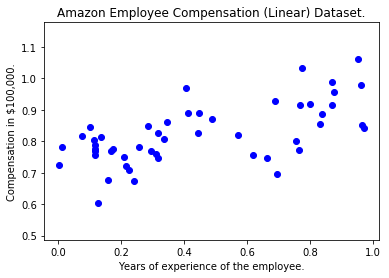

In [1]:
from dataset import dataset_generator
# Initialize a dataset creator
dataset = dataset_generator(dimensions = 1)
dataset.demo()

Formally, Supervised learning is the process of establishing through a model, the relationship or mapping between $(\bf{x} ,y)$ using $(\bf{x_i},y_i) \in D \forall i \in [i,n]$, such that once established, given a new sample $x_{n+j} \notin D$ and $j<m$, the model estimates $y_{n+j}$. Informally, we want to learn a model using the training part of the dataset, such that we should be able to predict the associated label for samples from the remaining. The dataset $D$ is called the training dataset and the set of samples $x_i, i \in (n, n + m] is called the generalization dataset. The generalization dataset is typically the real world. If we have the knowledge of the actual targets of the samples in the generalization set, we call it the testing set, as we can use it to test the quality of our model before deploying it in the real world.

Models are usually of the form $\hat{y} = g(\bf{X},w)$ where, $w$ are the parameters or weights of the model that transform $X$ to \hat{y}. In short, a model is a functional form that was predetermined that depends on some to-be determined parameters whose values are to be learnt using the data.

## Least Squares Linear Regression.

Let us posit that the experience of the candidates and their compensation are linearly related. What this means is that we are making a decision that the relationship between the candidates’ experience and the salaries is captured by a straight line. With this assumption, we have are limiting the architecture of our problem to linear models and converted our problem into a linear regression problem. Essentially, if our data is $x \in \mathbb{R}^1$, then our prediction is, 
$$ \hat{y} = w_1x + b.$$
If $\bf{x} \in \mathbb{R}^d $, then 
$$ \hat{y} = \sum_{i=1}^d w_ix^i + b.$$

To know how good our predictions are we need some metric to measure our errors. Consider the root-mean-squared error or the RMSE,
$$ e_i(\bf{w}) = \vert \vert \hat{y_i} - y_i \vert \vert_2, $$
which, will tell us how *far* away our prediction $\hat{y_i}$ is from the actual value $y_i, \forall i \in [0,n]$ in the Euclidean sense. For our entire dataset, we can have a cumulative error defined as,
$$e(\bf{w}) = \sum_{i=1}^n \vert \vert y_i - \hat{y_i} \vert \vert_2,$$
or,
$$ e(\bf{w}) = \sum_{i=1}^n \vert \vert y_i - W^TX + b \vert \vert_2.$$

This error is often referred to as the objective. This is what we want to minimize. We want those parameters $w$, that will get us to be as low as possible $e(w)$. Formally, we want,
$$ \hat{w} = \arg\min_w e(w). $$
We can derive a solution for this optimization problem analytically.
$$ e(w) = \frac{1}{2}(y-w^TX)^T(y-w^TX),$$
$$\frac{\partial e}{\partial w} = -X^Tt + X^TXw,$$
equating this to zero to obtain minima we get,
$$X^TXw = X^TX,$$
$$\hat{w} = (X^TX)^{-1}X^Ty.$$
\hat{w} is will give us the minimum most error possible and this solution is called the analytical solution.

### Implementing the analytical solution.

Let us run our dataset through this analytical solution and see if it will work. The regressor base class is defined in (analytical_solution)[analytical_solution.py] file. The core of this code is (line 20)[analytical_solution.py#L20-L20], which is the following.
```python 
w = np.dot(np.linalg.pinv(np.dot(x.T,x)), np.dot(x.T,self.y))
```
As can be seen, it is a direct implementation of the analytical solution.

To see this in action let us create a training dataset of 40 samples from our generator and use our regressor to estimate the analytical $w$. 

In [3]:
from analytical_solution import regressor
data_train = dataset.query_data(samples = 40) # Create a training dataset.  
r = regressor(data_train)  # This call should return a regressor object that is fully trained.
params = r.get_params()    # This call should return parameters of the model that are 
                           # fully trained.

Now let us see how well we are doing. Let us use the same dataset distribution to query 40 additional samples for testing. We can use this testing dataset to make our predictions for the linear regressor. Once we have the predictions, we can use the RMSE to check how well we are doing.

In [4]:
from errors import rmse
data_test = dataset.query_data(samples = 40)  # Create a random testing dataset.
predictions = r.get_predictions(data_test[0]) # This call should return predictions.
print ("Rmse error of predictions = " + str(rmse(data_test[1], predictions)))

Rmse error of predictions = 0.0803354209008


The model is a line. We should be able to visualize this line as shown below.

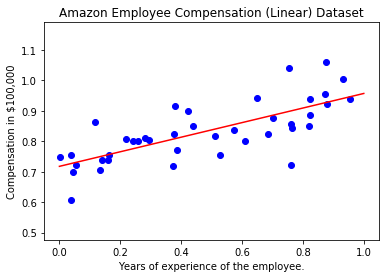

In [5]:
r.plot(data_train)

We can clearly see here that our simple model works pretty fine. Although for this simple linear model an analytical solution does exist, we find that for more complex problem structures we have to rely on some optimization procedures that are described in the later lectures. For the moment we shall stick with this analytical solution and study linear regression in these settings.

This notebook was written by Ragav Venkatesan (ragavven@amazon.com) with material referred from the book 'Convolutional Neural Networks in Visual Computing'. Some of the material might be copyrighted to the author and other copyright holders.